# Explore here

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform, norm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Bank Marketing Campaign dataset from URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [128]:
#do a zero count 

zero_count = (df == 0).sum().sum()
print(f"Number of zeros in DataFrame: {zero_count}")

Number of zeros in DataFrame: 1263


In [129]:
# Split the data into x and y 
X = df.drop('Outcome', axis=1) 
y = df['Outcome']  # The target variable (subscription outcome) 

In [130]:
X.shape

(768, 8)

In [131]:
y.shape 

(768,)

In [132]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Replace zeros with the column mean
df = df.apply(lambda col: col.replace(0, col.mean()) if col.dtype != 'object' else col)

print("\nDataFrame after replacing zeros with column mean:")
df.head()


DataFrame after replacing zeros with column mean:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.000000
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.348958
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.000000
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.348958
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.000000


In [134]:
# Split 80% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")    

Total rows: 768
Dimensions of X_train: (614, 8)
Dimensions of y_train: (614,)
Proportion of train set: 614 / 768 = 0.80 = 80%


In [135]:
# Split 20% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 768
Dimensions of X_test: (154, 8)
Dimensions of y_test: (154,)
Proportion of test set: 154 / 768 = 0.20 = 20%


In [136]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [137]:
X_train.head(10)    
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
340,1,130,70,13,105,25.9,0.472,22
535,4,132,0,0,0,32.9,0.302,23
306,10,161,68,23,132,25.5,0.326,47
718,1,108,60,46,178,35.5,0.415,24
90,1,80,55,0,0,19.1,0.258,21


In [138]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [139]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [140]:
y = df['Outcome']  # Replace with the correct column name


In [141]:
print(X.dtypes)
print(y.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object
float64


In [142]:
y = y.astype('int')  # If numeric
    

In [143]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [144]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))
    

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [145]:
# Define the model
model = RandomForestClassifier(random_state=42)

In [146]:
#Define the Parameter Grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#Set Up GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Evaluation metric
    verbose=2,          # Prints progress
    n_jobs=-1           # Use all available cores
)

#Fit the Grid Search to the Data
grid_search.fit(X_train, y_train)

# Get the Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_sample

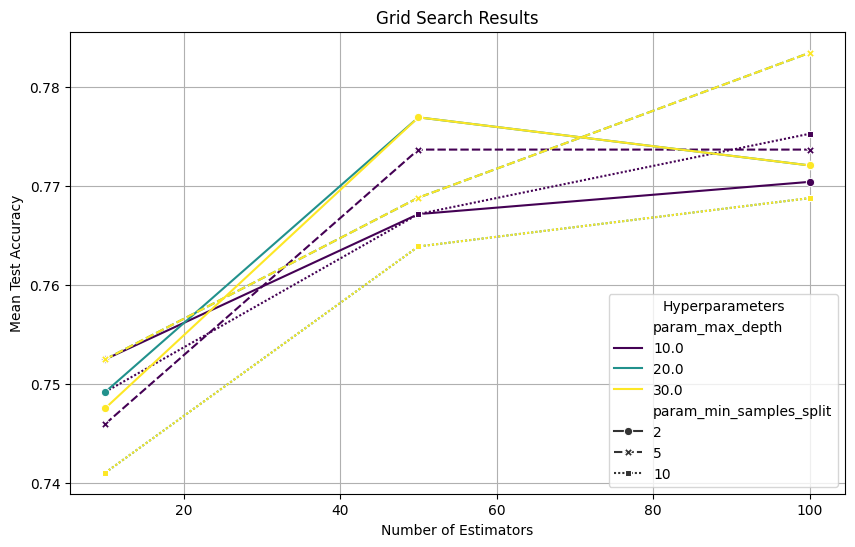

In [148]:
# Line Plot: Accuracy vs. Number of Estimators
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    style='param_min_samples_split',
    markers=True,
    palette='viridis'
)
plt.title('Grid Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Accuracy')
plt.legend(title='Hyperparameters')
plt.grid()
plt.show()

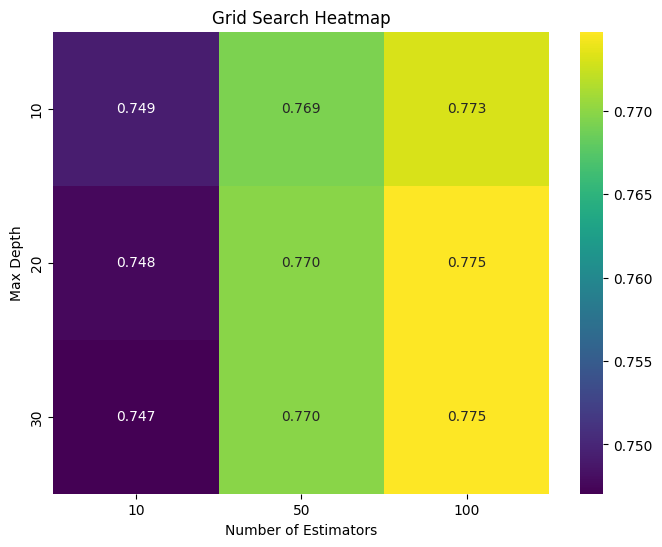

In [150]:
# Heatmap: Accuracy for Different Hyperparameter Combinations
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.title('Grid Search Heatmap')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()